# How Popular was President Trump: in Africa, the US and the World at Large in 2018?

In this data set we will be exploring what are the views African citizens of the most populous and influential countries in the West, North, South and East (Nigeria, Tunisia, South Afirca and Kenya) think of the US and their president? We also want to see how the wolrd rates Trump and how the US still sees him in comparison to Obama. 

### Since taking office Donald Trump has been viewed as one of the most controversial presidents the US has had. Many scandals and issues. We want to see just how popular Trump is around the world, specifically in Africa?

To learn about this we ask three main questions: 
1. What do African citizens think of the US and Trump
2. What do the citizens of the world think of Trump 
3. What do Americans think of Trump?


## Sources

1. Pew Research Center Spring 2018 Survey Data: 
https://www.pewresearch.org/global/dataset/spring-2018-survey-data/

2. Opinion_polling_on_the_Donald_Trump_administration from Wikipedia
"https://en.wikipedia.org/wiki/Opinion_polling_on_the_Donald_Trump_administration"


The data that is webscraped is taken from Wikipedia where it compiles a data from polls across the US Comparing the ratings of Donald Trump and other politicians: Pence, Pelosi, Schumer and Obama:

I downloaded the Survey Data. Realised it was in .sav file, used R to convert it to a .csv file. I also dropped a lot of columns since it could not all load into Jupyter Hub. 

The questions I am trying to answer as will be listed below where asked in the survey however, no one had done any analysis on what African countries think of the US Specifically, that is why they are focus currently.
I had to read the Pew Research Survey Questions and under Ref: saw which columns belong to which questions.

## Assumptions 

1. Some of my hypotheses is that African citizens will find the US Favorable, may or may not see it as a threat, will believe that the US respects it's citizens and does not like Trump. As a result we could say that Africa's view is to remain liking the US and to dislike Trump. 
2. I think the World would prefer Obama to Trump. 
3. I also think that that America would prefer Obama to Trump. 
4. Trump is a very unpopular president: in Africa, the world and US

## Data Exploration

In this section we want to answer 5 questions to determine what African citizens think of the US:

1. Did African Citizens in 2018 see the US in a favorable manner?
2. Did African Citizens in 2018 see the US as a threat?
3. Who did African Citizens believe in 2018 was the economic power of the world?
4. Did African citizens in 2018 believe the US goverment respects the personal freedom of its citizens?
5. In 2018, did African Citizens have confidence in Trump?

To see how popular Donald Trump is around the world we analyze the question: 

1. In 2018, did the citizens of the world have confidence in Trump 

To see how popular Donald Trump is around in the US we analyze the question: 

1. In the years 2017 - 2020, how popular was Donald Trump compared to predecessor, Obama throughout his presidency?


In [65]:
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [66]:
global_attitudes = pd.read_csv("globalTrump.csv")
obama_attitudes = pd.read_csv("Obama2010.csv")

In [67]:
global_attitudes.shape

(30109, 20)

#### There are four African countries. African_attitudes is created to only have record of responses from the 4 African Countries surveyed. 

In [68]:
african_attitudes = global_attitudes[global_attitudes['COUNTRY'].isin(['Nigeria', 'Kenya', 'South Africa', 'Tunisia'])]

In [69]:
#Shape
african_attitudes.shape

(4564, 20)

#### Here we want to check if there any missing data. If there are we shall delete or drop them.


In [70]:
#Data Cleaning 
african_attitudes.isna().sum()

ID                        0
survey                    0
COUNTRY                   0
fav_US                    0
fav_China                 0
intthreat_chpower         0
INTTHREAT_USPOWER         0
intthreat_ruspower        0
econ_power                0
respect_china             0
respect_us                0
US_WORLD_ROLE             0
worldleader_USChina       0
confid_trump              0
confid_xi                 0
confid_putin              0
confid_merkel             0
Unnamed: 17            4564
USREL_BETTERWORSE         0
involved_US               0
dtype: int64

#### Unnamed: 17 has all it's cells Nan. So we drop it. All of the others are 0, so no need to.

In [71]:
#Remove the column with Nan Values 
african_attitudes = african_attitudes.drop(['Unnamed: 17'], axis=1)
african_attitudes.shape

(4564, 19)

## How Popular was the US and Trump in 2018 in Africa?

### Did African Citizens in 2018 see the US in a favorable manner?
Original question in Survey: Plese tell me if you have a very favorable, somewhat favorable, somewhat unfavorable, or very unfavorable opinion of US? 

In [72]:
import re
african_attitudes[african_attitudes['fav_US'].str.contains('(DO NOT READ)', case=True, regex=True) == True]

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,ID,survey,COUNTRY,fav_US,fav_China,intthreat_chpower,INTTHREAT_USPOWER,intthreat_ruspower,econ_power,respect_china,respect_us,US_WORLD_ROLE,worldleader_USChina,confid_trump,confid_xi,confid_putin,confid_merkel,USREL_BETTERWORSE,involved_US
22650,22651,"Spring, 2018",Tunisia,Don’t know (DO NOT READ),Very favorable,Not a threat,Minor threat,Don't know (DO NOT READ),Japan,Don’t know (DO NOT READ),Don’t know (DO NOT READ),More important role,China is the world’s leading power,No confidence at all,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Stayed about the same,About the same
22669,22670,"Spring, 2018",Tunisia,Don’t know (DO NOT READ),Somewhat favorable,Not a threat,Not a threat,Not a threat,Japan,Don’t know (DO NOT READ),"No, does not respect personal freedoms",Less important role,Neither (DO NOT READ),No confidence at all,Some confidence,No confidence at all,Don’t know (DO NOT READ),Gotten better,Doing more
22677,22678,"Spring, 2018",Tunisia,Don’t know (DO NOT READ),Somewhat favorable,Not a threat,Not a threat,Not a threat,The United States,Don’t know (DO NOT READ),Don’t know (DO NOT READ),As important as 10 years ago,The U.S. is the world’s leading power,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Gotten better,About the same
22691,22692,"Spring, 2018",Tunisia,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Not a threat,Don't know,Not a threat,The United States,"Yes, respects personal freedoms","Yes, respects personal freedoms",As important as 10 years ago,The U.S. is the world’s leading power,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don't know,Don’t know (DO NOT READ)
22699,22700,"Spring, 2018",Tunisia,Don’t know (DO NOT READ),Somewhat favorable,Not a threat,Major threat,Major threat,The United States,"Yes, respects personal freedoms","No, does not respect personal freedoms",More important role,China is the world’s leading power,No confidence at all,Some confidence,No confidence at all,No confidence at all,Gotten worse,Doing less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27116,27120,"Spring, 2018",South Africa,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Major threat,Major threat,Major threat,The United States,"No, does not respect personal freedoms","No, does not respect personal freedoms",As important as 10 years ago,China is the world’s leading power,No confidence at all,No confidence at all,No confidence at all,No confidence at all,Stayed about the same,About the same
27124,27128,"Spring, 2018",South Africa,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don't know (DO NOT READ),Don't know,Don't know (DO NOT READ),None/There is no leading economic power (DO NO...,"Yes, respects personal freedoms","Yes, respects personal freedoms",Don't know,Neither (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Stayed about the same,Don’t know (DO NOT READ)
27142,27147,"Spring, 2018",South Africa,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Refused (DO NOT READ),Refused,Don't know (DO NOT READ),Don't know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),As important as 10 years ago,Don’t know (DO NOT READ),Refused (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don’t know (DO NOT READ),Don't know,About the same
27143,27148,"Spring, 2018",South Africa,Don’t know (DO NOT READ),Don’t know (DO NOT READ),Minor threat,Major threat,Not a threat,China,"Yes, respects personal freedoms","No, does not respect personal freedoms",Less important role,China is the world’s leading power,No confidence at all,A lot of confidence,Don’t know (DO NOT READ),Not too much confidence,Stayed about the same,U.S. does not help (DO NOT READ)


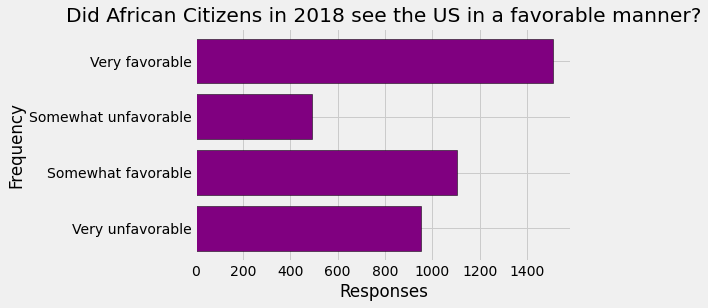

In [73]:
from collections import Counter
fav_us_africa = african_attitudes.filter(items=['ID', 'COUNTRY', 'fav_US']) #filter columns 
#drop rows that we are asked not to read: where the answer is Refused or Dont know 
drop_rows = fav_us_africa[fav_us_africa['fav_US'] == 'Refused (DO NOT READ)' ].index 
fav_us_africa.drop(drop_rows, inplace = True) 
drop_rows = fav_us_africa[fav_us_africa['fav_US'] == 'Don’t know (DO NOT READ)'].index 
fav_us_africa.drop(drop_rows, inplace = True) 
fav_us_unique = fav_us_africa['fav_US'].unique()
frequency = []
fav_us_dict = Counter(fav_us_africa['fav_US'])
for response in fav_us_unique:
        frequency.append(fav_us_dict.get(response))
plt.barh(fav_us_unique, frequency,  color='purple', edgecolor = 'black')
plt.title("Did African Citizens in 2018 see the US in a favorable manner?")
plt.ylabel("Frequency")
plt.xlabel("Responses")
plt.show()

#### Conclusion: Majority of African Citizens saw the US in a favorable manner. 


### Did African Citizens in 2018 see the US as a threat?

Original question in Survey: I’d like your opinion about some possible international concerns for (survey country). Do you think that [INSERT ITEM]- (United States Power and Influence) is a major threat, a minor threat, or not a threat to (survey country)? 

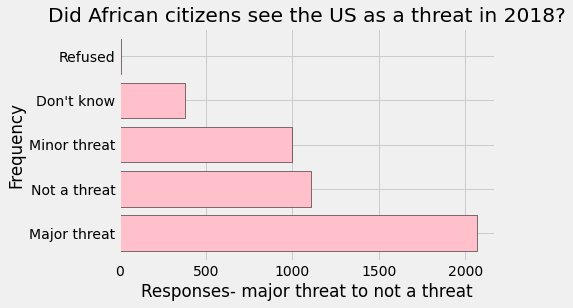

In [74]:
us_threat_africa = african_attitudes.filter(items=['ID', 'COUNTRY', 'INTTHREAT_USPOWER'])
us_threat_unique = us_threat_africa['INTTHREAT_USPOWER'].unique()
frequency = []
us_threat_dict = Counter(us_threat_africa['INTTHREAT_USPOWER'])

for response in us_threat_unique:
        frequency.append(us_threat_dict.get(response))
plt.barh(us_threat_unique, frequency,  color='pink', edgecolor = 'black')
plt.title("Did African citizens see the US as a threat in 2018?")
plt.ylabel("Frequency") 
plt.xlabel("Responses- major threat to not a threat")
# plt.xticks(size, fav_us_africa['fav_US'])
plt.show()

#### Conclusion: Majority of African Citizens saw the US as a major threat. However, almost as many citizens thought the US was a Minor Threat or not a threat.


### Who did African Citizens believe in 2018 to be the economic power of the world?
Original Question in Survey: Today, which ONE of the following do you think is the world’s leading economic power? 

In [75]:
economic_power_afr = african_attitudes.filter(items=['ID', 'COUNTRY', 'econ_power'])
economic_power_uni = economic_power_afr['econ_power'].unique()
power = economic_power_afr.groupby(['econ_power', 'COUNTRY']).count()
power

ID
econ_power                                         COUNTRY          
China                                              Kenya         364
                                                   Nigeria       403
                                                   South Africa  606
                                                   Tunisia       341
Don't know (DO NOT READ)                           Kenya          66
                                                   Nigeria       133
                                                   South Africa   97
                                                   Tunisia        19
Japan                                              Kenya         111
                                                   Nigeria        76
                                                   South Africa   99
                                                   Tunisia       150
None/There is no leading economic power (DO NOT... Kenya           5
                                                   Nigeria         4
                                                   South Africa   17
                                                   Tunisia         1
Other (DO NOT  READ)                               Kenya          12
                                                   Nigeria        13
                                                   South Africa   23
                                                   Tunisia         7
Refused (DO NOT READ)                              Nigeria         2
                                                   South Africa    2
The United States                                  Kenya         406
                                                   Nigeria       325
                                                   South Africa  492
                                                   Tunisia       369
The countries of the European Union                Kenya          75
                                                   Nigeria        57
                                                   South Africa  145
                                                   Tunisia       144

Drop cells as they were not meant ot be used in analysis

In [76]:
drop_rows_one = economic_power_afr[economic_power_afr['econ_power'] == 'Refused (DO NOT READ)' ].index 
drop_rows_two = economic_power_afr[economic_power_afr['econ_power'] ==  "Don't know (DO NOT READ)" ].index 
drop_rows_three = economic_power_afr[economic_power_afr['econ_power'] ==  'Other (DO NOT  READ)' ].index 
drop_rows_four = economic_power_afr[economic_power_afr['econ_power'] ==  'None/There is no leading economic power (DO NOT READ)' ].index
#drop columns that should not be read.
economic_power_afr.drop(drop_rows_one, inplace = True) 
economic_power_afr.drop(drop_rows_two, inplace = True)  
economic_power_afr.drop(drop_rows_three, inplace = True) 
economic_power_afr.drop(drop_rows_four, inplace = True)
power = economic_power_afr.groupby(['econ_power', 'COUNTRY']).count()
power

ID
econ_power                          COUNTRY          
China                               Kenya         364
                                    Nigeria       403
                                    South Africa  606
                                    Tunisia       341
Japan                               Kenya         111
                                    Nigeria        76
                                    South Africa   99
                                    Tunisia       150
The United States                   Kenya         406
                                    Nigeria       325
                                    South Africa  492
                                    Tunisia       369
The countries of the European Union Kenya          75
                                    Nigeria        57
                                    South Africa  145
                                    Tunisia       144

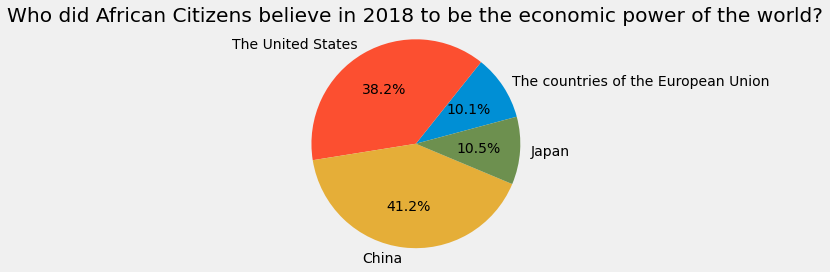

In [77]:
economic_power_uni = economic_power_afr['econ_power'].unique()
size = len(us_threat_unique)
frequency = []
econ_pow_dict = Counter(economic_power_afr['econ_power'])
for response in economic_power_uni:
        frequency.append(econ_pow_dict.get(response))
plt.pie(frequency, labels = economic_power_uni, autopct='%1.1f%%',startangle=15)
# plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('Who did African Citizens believe in 2018 to be the economic power of the world?')
plt.axis('equal')
plt.show()   

#### Conclusion: Majority of African Citizens saw China, rather than the US as the economic power of the world.

### In 2018, Did African citizens believe the US goverment respects the personal freedom of its citizens?
Do you think the government of [INSERT ITEM] respects the personal freedoms of its people or don’t you think so? 

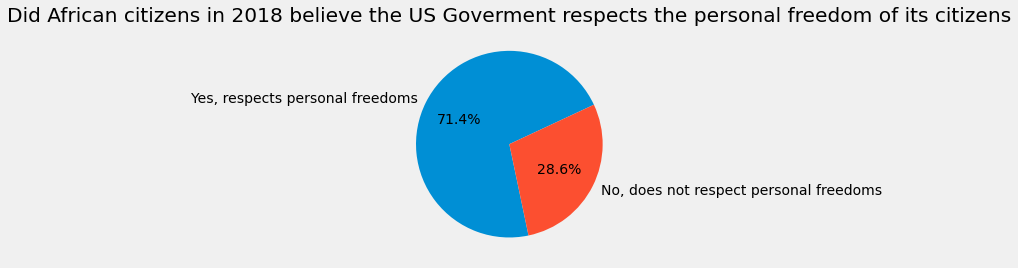

In [78]:
resp_us_africa = african_attitudes.filter(items=['ID', 'COUNTRY', 'respect_us'])
frequency = []
drop_one = resp_us_africa[resp_us_africa['respect_us'] == 'Don’t know (DO NOT READ)'].index
drop_two = resp_us_africa[resp_us_africa['respect_us'] == 'Refused (DO NOT READ)'].index
resp_us_africa.drop(drop_one, inplace = True)
resp_us_africa.drop(drop_two, inplace = True)
resp_us_unique = resp_us_africa['respect_us'].unique()
resp_us_dict = Counter(resp_us_africa['respect_us'])
for response in resp_us_unique:
        frequency.append(resp_us_dict.get(response))
plt.pie(frequency, labels = resp_us_unique, autopct='%1.1f%%',startangle=25)
plt.title("Did African citizens in 2018 believe the US Goverment respects the personal freedom of its citizens")
plt.show()

#### Conclusion: Majority of African Citizens believed the US Respected the Personal Freedom of its citizens.



### In 2018, did African Citizens have confidence in Trump?

Original Question: Now I’m going to read a list of political leaders. For each, tell me how much confidence you have in each leader to do the right thing regarding world affairs – a lot of confidence, some confidence, not too much confidence, or no confidence at all. 
a. Donald Trump

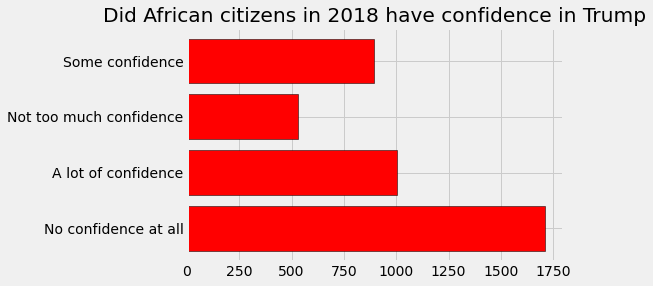

In [79]:
conf_afr = african_attitudes.filter(items=['ID', 'COUNTRY', 'confid_trump'])
frequency = []
drop_one = conf_afr[conf_afr['confid_trump'] == 'Don’t know (DO NOT READ)'].index
drop_two = conf_afr[conf_afr['confid_trump'] == 'Refused (DO NOT READ)'].index
conf_afr.drop(drop_one, inplace = True)
conf_afr.drop(drop_two, inplace = True)
conf_afr_uni = conf_afr['confid_trump'].unique()
conf_afr_dict = Counter(conf_afr['confid_trump'])
for response in conf_afr_uni:
        frequency.append(conf_afr_dict.get(response)) 
        
plt.barh(conf_afr_uni, frequency, color='red', edgecolor = 'black')
plt.title("Did African citizens in 2018 have confidence in Trump")
plt.show()

#### Conclusion: Most African Citizens had no confidence in Trump


## How poular is Trump Globally: Is the World Confident About Trump? When Obama was president was the world more confident in him?

Original Question: Now I’m going to read a list of political leaders. For each, tell me how much confidence you have in each leader to do the right thing regarding world affairs – a lot of confidence, some confidence, not too much confidence, or no confidence at all. 
a. Donald Trump

In order to some differences, we change the categorical data sets to discrete. A lot of confidence is 4 points, Some confidence is 3, Not too much confidence is 2 and No confidence at all is 2. 

We are doing this to see if there are any outlier countries. Any countries that have very low confidence in Trump and thos that have high confidence.

In [80]:
conf_ = global_attitudes.filter(items=['ID', 'COUNTRY', 'confid_trump'])
drop_one = conf_[conf_['confid_trump'] == 'Don’t know (DO NOT READ)'].index
drop_two = conf_[conf_['confid_trump'] == 'Refused (DO NOT READ)'].index
conf_.drop(drop_one, inplace = True)
conf_.drop(drop_two, inplace = True)
conf_uni = conf_afr['confid_trump'].unique()
conf_dict = Counter(conf_afr['confid_trump'])
conf_ = conf_.replace('A lot of confidence', 4)
conf_ = conf_.replace('Some confidence', 3)
conf_ = conf_.replace('Not too much confidence', 2)
conf_ = conf_.replace('No confidence at all', 1)
sampleTrump = conf_.sample(5000)
sampleTrump.describe()

,ID,confid_trump
count,5000.000000,5000.000000
mean,14808.627800,2.003200
std,8906.114073,1.051005
min,2.000000,1.000000
25%,6947.750000,1.000000
50%,14132.500000,2.000000
75%,22625.500000,3.000000
max,30132.000000,4.000000


In [81]:
obama = obama_attitudes
drop1 = obama[obama['Q34A'] == "Don't know" ].index
drop2 = obama[obama['Q34A'] == "Refused" ].index
obama.drop(drop1, inplace = True)
obama.drop(drop2, inplace = True)
obama = obama.replace('A lot of confidence', 4)
obama = obama.replace('Some confidence', 3)
obama = obama.replace('Not too much confidence', 2)
obama = obama.replace('No confidence at all', 1)

sampleObama = obama.sample(5000)
sampleObama.describe()

,PSRAID,Q34A
count,5000.000000,5000.000000
mean,112135.188800,2.647400
std,7279.787532,1.004428
min,100001.000000,1.000000
25%,105584.000000,2.000000
50%,112176.500000,3.000000
75%,118594.250000,3.000000
max,124779.000000,4.000000


In [82]:
samples = pd.concat([sampleTrump, sampleObama] , axis = 0 , ignore_index = True)
samples

,ID,COUNTRY,confid_trump,PSRAID,MUSLIM,Q34A
0,19175.0,Japan,2.0,NaN,NaN,NaN
1,2332.0,Canada,1.0,NaN,NaN,NaN
2,17385.0,Indonesia,4.0,NaN,NaN,NaN
3,23660.0,Tunisia,1.0,NaN,NaN,NaN
4,4599.0,Greece,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...
9995,NaN,Jordan,NaN,117041.0,Muslim,2.0
9996,NaN,India,NaN,119203.0,Not Muslim,4.0
9997,NaN,India,NaN,119504.0,Not Muslim,3.0
9998,NaN,Indonesia,NaN,111943.0,Muslim,3.0


In [83]:
print("The median for Trump's approval rating is: ", sampleTrump['confid_trump'].median())
print("The median for Obama's approval rating is: ", sampleObama['Q34A'].median())
print("The mean for Trump's approval rating is: ", sampleTrump['confid_trump'].mean())
print("The mean for Obama's approval rating is: ", sampleObama['Q34A'].mean())

The median for Trump's approval rating is:  2.0
The median for Obama's approval rating is:  3.0
The mean for Trump's approval rating is:  2.0032
The mean for Obama's approval rating is:  2.6474


#### Conclusion: The world has more confidence in Obama 

In [84]:
#outliers? 
groupTrump = sampleTrump.groupby("COUNTRY").mean()
outlierTrump = groupTrump.sort_values('confid_trump')
q = sampleTrump['confid_trump'].median()
len(groupTrump)
q1range = outlierTrump[:14]
q3range = outlierTrump[14:]
q3range
q1 = q1range['confid_trump'].median()
q3 = q3range['confid_trump'].median()

iqr = q3 - q1
outlier1 = q1 - (1.5 * iqr)
outlier3 = q3 + (1.5 * iqr)

groupTrump.reset_index()
low_outliers = groupTrump[groupTrump['confid_trump'] < outlier1].index
low_outliers = low_outliers.tolist()

high_outliers = groupTrump[groupTrump['confid_trump'] > outlier3].index
high_outliers = high_outliers.tolist()

print(low_outliers)
print(high_outliers)

[]
[]


#### Conclusion: There are no outliers.

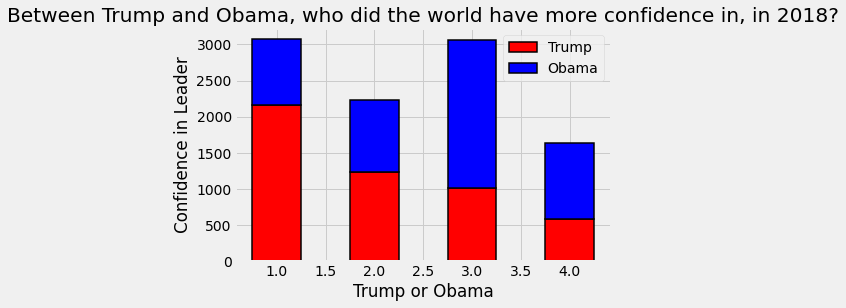

In [85]:
t_r_1 = len(sampleTrump[(sampleTrump.confid_trump == 1)])
t_r_2 = len(sampleTrump[(sampleTrump.confid_trump == 2)])
t_r_3 = len(sampleTrump[(sampleTrump.confid_trump == 3)])
t_r_4 = len(sampleTrump[(sampleTrump.confid_trump == 4)])
trump = [t_r_1, t_r_2, t_r_3, t_r_4]

o_r_1 = len(sampleObama[(sampleObama.Q34A == 1)])
o_r_2 = len(sampleObama[(sampleObama.Q34A == 2)])
o_r_3 = len(sampleObama[(sampleObama.Q34A == 3)])
o_r_4 = len(sampleObama[(sampleObama.Q34A == 4)])
obama = [o_r_1, o_r_2, o_r_3, o_r_4]

r = np.arange(1, 5)
bar_names = ["Trump", "Obama"]
plt.bar(r, trump, color='red', edgecolor='black', width= 0.5, linewidth = 1.5, label = 'Trump')
plt.bar(r, obama, bottom=trump, color='blue', edgecolor='black', linewidth = 1.5, width=0.5, label = 'Obama')

plt.xlabel("Trump or Obama")
plt.ylabel("Confidence in Leader")
plt.title("Between Trump and Obama, who did the world have more confidence in, in 2018?")
plt.legend()
plt.show()

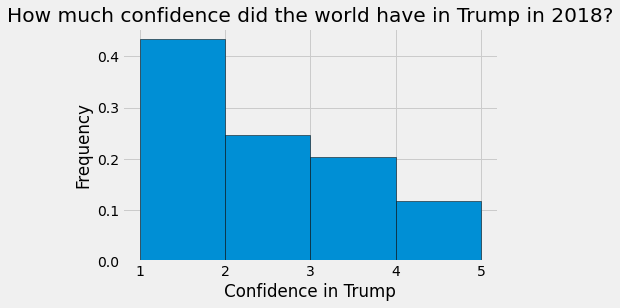

In [86]:
ratings = sampleTrump['confid_trump']
ratings_bins = np.arange(1, 6, 1)
plt.hist(ratings, ratings_bins, density=True, edgecolor = 'black') # denisty parameter gives us a relative distribution value
plt.xlabel("Confidence in Trump")
plt.ylabel("Frequency")
plt.title('How much confidence did the world have in Trump in 2018?') 
plt.show()

#### If we meet 5 people anywhere in the world, how likely are they to have no confidence in Trump?

In [87]:
counters = sampleTrump[sampleTrump['confid_trump']==1].index

options = [1, 2, 3, 4]
from copy import deepcopy
from fractions import Fraction
data = {'Rating': [], 
        'Probability':[]
}
def pick_four_cards(xlist):
    deck = deepcopy(xlist)
    ten_num = len(counters)
    for i in range(8):
        person_picked = np.random.choice(deck)
        data['Rating'].append(person_picked)
        if person_picked == 3:
            ten_num -= 1
        data['Probability'].append(str(ten_num) +'/' + str(len(deck)))
    df = pd.DataFrame (data, columns = ['Probability'])
    return df
    
#turn dataframe into a table 


# the probability that you will draw a card with suit "♣︎" = 13/52
pick_four_cards(ratings)

,Probability
0,2169/5000
1,2168/5000
2,2168/5000
3,2168/5000
4,2168/5000
5,2168/5000
6,2168/5000
7,2168/5000


#### The world definitely preferred Obama to Trump. Trump is not popular amongst the world. 

## How popular is Trump in the US: Does America Prefer Trump or Obama?

In [88]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate
url = "https://en.wikipedia.org/wiki/Opinion_polling_on_the_Donald_Trump_administration"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
table = soup.find_all('table') 
df = pd.read_html(str(table))
df = pd.DataFrame(df[1])

In [89]:
df.to_csv('trump_obama_poll.csv')
trump_obama = pd.read_csv('trump_obama_poll.csv')
trump_obama

,Unnamed: 0,Area polled,Segment polled,Polling group,Date,Donald Trump favorable,Barack Obama favorable,Sample size,Polling method,Source
0,0,United States,Registered voters,NBC News/Wall Street Journal,"August 9–12, 2020",40%,54%,900,telephone,[3]
1,1,Wisconsin,Registered voters,Marquette University Law School,"June 14–18, 2020",42%,61%,805,telephone,[4]
2,2,United States,Registered voters,NBC News/Wall Street Journal,"May 28 – June 2, 2020",40%,57%,1000,telephone,[5]
3,3,United States,Registered voters,Fox News,"May 17–20, 2020",43%,63%,1207,telephone,[6]
4,4,United States,Registered voters,Monmouth University,"April 30 – May 4, 2020",40%,57%,739,telephone,[7]
5,5,Wisconsin,Registered voters,Marquette University Law School,"November 13–17, 2019",46%,54%,801,telephone,[8]
6,6,United States,All adults,Grinnell College,"October 17–23, 2019",42%,61%,1003,telephone,[9]
7,7,United States,Registered voters,NBC News/Wall Street Journal,"September 13–16, 2019",41%,54%,900,telephone,[10]
8,8,United States,Registered voters,Fox News,"August 11–13, 2019",42%,60%,1013,telephone,[11]
9,9,United States,Registered voters,NBC News/Wall Street Journal,"September 16–19, 2018",39%,54%,900,telephone,[12]


In [90]:
trump_obama.columns

Index(['Unnamed: 0', 'Area polled', 'Segment polled', 'Polling group', 'Date',
       'Donald Trump favorable', 'Barack Obama favorable', 'Sample size',
       'Polling method', 'Source'],
      dtype='object')

In [91]:
trump_obama = trump_obama.drop('Unnamed: 0', axis = 1)
trump_obama = trump_obama.drop('Source', axis = 1)
trump_obama.head()

,Area polled,Segment polled,Polling group,Date,Donald Trump favorable,Barack Obama favorable,Sample size,Polling method
0,United States,Registered voters,NBC News/Wall Street Journal,"August 9–12, 2020",40%,54%,900,telephone
1,Wisconsin,Registered voters,Marquette University Law School,"June 14–18, 2020",42%,61%,805,telephone
2,United States,Registered voters,NBC News/Wall Street Journal,"May 28 – June 2, 2020",40%,57%,1000,telephone
3,United States,Registered voters,Fox News,"May 17–20, 2020",43%,63%,1207,telephone
4,United States,Registered voters,Monmouth University,"April 30 – May 4, 2020",40%,57%,739,telephone


In [92]:
trump_obama.rename(columns={'Donald Trump favorable':'Trump_Favorable', 'Barack Obama favorable':'Obama_Favorable'}, inplace = True)
trump_obama.head()

,Area polled,Segment polled,Polling group,Date,Trump_Favorable,Obama_Favorable,Sample size,Polling method
0,United States,Registered voters,NBC News/Wall Street Journal,"August 9–12, 2020",40%,54%,900,telephone
1,Wisconsin,Registered voters,Marquette University Law School,"June 14–18, 2020",42%,61%,805,telephone
2,United States,Registered voters,NBC News/Wall Street Journal,"May 28 – June 2, 2020",40%,57%,1000,telephone
3,United States,Registered voters,Fox News,"May 17–20, 2020",43%,63%,1207,telephone
4,United States,Registered voters,Monmouth University,"April 30 – May 4, 2020",40%,57%,739,telephone


In [93]:
polls_time = trump_obama
import datetime
for i in range(21):
    date = trump_obama.loc[i, 'Date']
    date = date[::-1]
    date = date[:4]
    date = date[::-1]
    polls_time.loc[i, 'Year'] = date
trump_obama.head()

,Area polled,Segment polled,Polling group,Date,Trump_Favorable,Obama_Favorable,Sample size,Polling method,Year
0,United States,Registered voters,NBC News/Wall Street Journal,"August 9–12, 2020",40%,54%,900,telephone,2020
1,Wisconsin,Registered voters,Marquette University Law School,"June 14–18, 2020",42%,61%,805,telephone,2020
2,United States,Registered voters,NBC News/Wall Street Journal,"May 28 – June 2, 2020",40%,57%,1000,telephone,2020
3,United States,Registered voters,Fox News,"May 17–20, 2020",43%,63%,1207,telephone,2020
4,United States,Registered voters,Monmouth University,"April 30 – May 4, 2020",40%,57%,739,telephone,2020


To see how Trump and Obama compare over the Trump Years, we want to see their popularity during the Trump Years.

In [94]:
#get the number, change to int, /100 and keep it as numeric.
for i in range(21):
    trump = trump_obama.loc[i, 'Trump_Favorable']
    obama = trump_obama.loc[i, 'Obama_Favorable']
    trump = trump[:2]
    obama = obama[:2]
    trump_obama.loc[i, 'Trump_Favorable'] = trump
    trump_obama.loc[i, 'Obama_Favorable'] = obama
# pd.to_numeric(polls_time['Trump Favorable'])

polls_time['Trump_Favorable'] = polls_time['Trump_Favorable'].astype(float)
polls_time['Obama_Favorable'] = polls_time['Obama_Favorable'].astype(float)
for i in range(21):
    trump = trump_obama.loc[i, 'Trump_Favorable']
    obama = trump_obama.loc[i, 'Obama_Favorable']
    trump = trump/100
    obama = obama/100
    trump_obama.loc[i, 'Trump_Favorable'] = trump
    trump_obama.loc[i, 'Obama_Favorable'] = obama
polls_time.head()
# group_poll

,Area polled,Segment polled,Polling group,Date,Trump_Favorable,Obama_Favorable,Sample size,Polling method,Year
0,United States,Registered voters,NBC News/Wall Street Journal,"August 9–12, 2020",0.40,0.54,900,telephone,2020
1,Wisconsin,Registered voters,Marquette University Law School,"June 14–18, 2020",0.42,0.61,805,telephone,2020
2,United States,Registered voters,NBC News/Wall Street Journal,"May 28 – June 2, 2020",0.40,0.57,1000,telephone,2020
3,United States,Registered voters,Fox News,"May 17–20, 2020",0.43,0.63,1207,telephone,2020
4,United States,Registered voters,Monmouth University,"April 30 – May 4, 2020",0.40,0.57,739,telephone,2020


In [95]:
group_poll = polls_time.groupby('Year').mean().reset_index()
group_poll

,Year,Trump_Favorable,Obama_Favorable,Sample size
0,2017,0.4200,0.5850,1754.125
1,2018,0.3700,0.6100,907.000
2,2019,0.4275,0.5725,929.250
3,2020,0.4100,0.5840,930.200


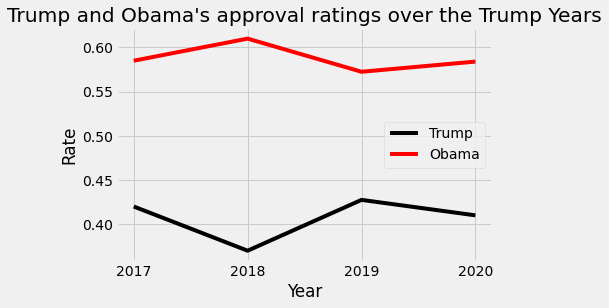

In [96]:
plt.plot(group_poll['Year'], group_poll['Trump_Favorable'], color='black', label="Trump")
plt.plot(group_poll['Year'], group_poll['Obama_Favorable'], color = 'red', label="Obama")
plt.title("Trump and Obama's approval ratings over the Trump Years")
plt.xlabel('Year')
plt.ylabel("Rate")
plt.legend()
plt.show()

#### Conclusion: Barrack Obama was liked a lot more than Donald Trump. Even when he is not president his ratings are over 50%, where as Trump never get to 45%. Also funny enough whenever Obama's ratings are high are when Trump's are low and vice versa.

In [97]:
import gc
del samples 
gc.collect()

83151

#### Final Conclusion: Trump is not liked by majority of African citizens, although they like the US and citizens of the world. Even in his own country he is not popular - he never gets above 50% rating and the past President is much higher.